In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..

/Users/taimourabdulkarim/Documents/Personal Github Repos/email_spam_detection


# Data Preprocessing

In [60]:
from email_spam_detection.data_preprocessing import *
from email_spam_detection.plotting import *
from email_spam_detection.train import *
from email_spam_detection.predict import *

In [9]:
df = load_data()
df.head()

,email,label
0,Subject: re : rankings\nthank you .,ham
1,"Subject: re : visit to enron\nvince ,\ndec . 2...",ham
2,Subject: research group move to the 19 th floo...,ham
3,Subject: christmas baskets\nthe christmas bask...,ham
4,"Subject: japan candidate\nvince ,\ni spoke wit...",ham


In [11]:
data_shape(df)

Shape of the dataset:  (36251, 2)


In [12]:
null_values(df)

Null values in the dataset:  email    3
label    0
dtype: int64


In [13]:
duplicate_values(df)

Duplicate values in the dataset:  2652


In [15]:
df = drop_duplicates(df)
data_shape(df)

Shape of the dataset:  (33599, 2)


In [16]:
df = drop_null_values(df)
data_shape(df)

Shape of the dataset:  (33597, 2)


# Visualize the data

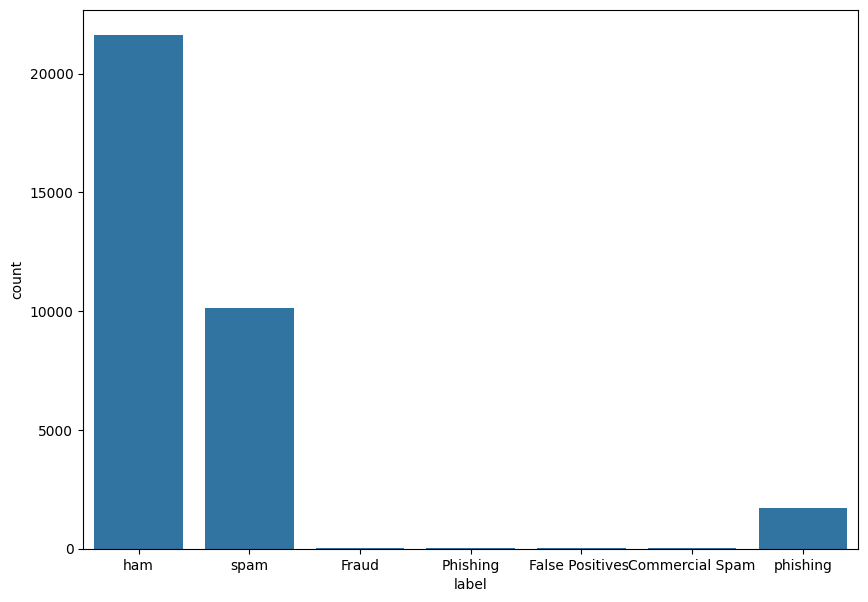

In [22]:
distribution_plot(df)

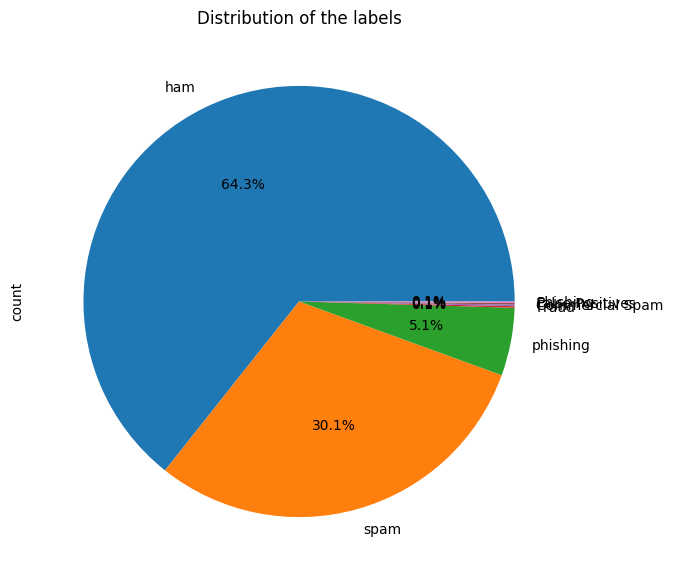

In [26]:
circular_distribution_plot(df)

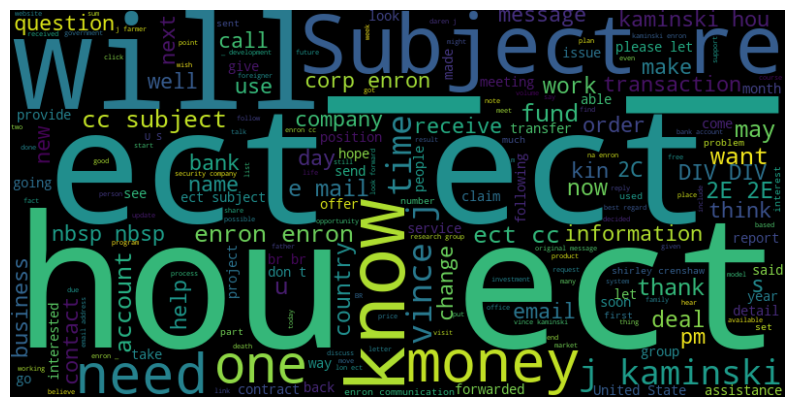

In [29]:
wordcloud_plot(df)

# Data Training

In [49]:
X = df["email"]
y = df["label"]

In [50]:
X_train, X_test, y_train, y_test = split_data(X, y)

In [51]:
X_train_vect, X_test_vect, vectorizer = vectorize_text(X_train, X_test)

In [52]:
model = train_model(X_train_vect, y_train)

/Users/taimourabdulkarim/miniconda3/envs/mlp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
accuracy, precision, recall, f1 = evaluate_model(model, X_test_vect, y_test)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Accuracy: 98.70535714285714
Precision: 98.61848291006793
Recall: 98.70535714285714
F1: 98.61608250435853


In [55]:
save_model(model)

In [56]:
save_vectorizer(vectorizer)

# Predictions

In [58]:
model = load_model()
vectorizer = load_vectorizer()

In [62]:
email = "Hi, I am a software engineer"
prediction = predict(model, vectorizer, email)
print(prediction)

ham
